# Final Group Project: Predict Life expectancy

**Project Info:**
- The dataset is getting from __[Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data)__
- Contributors
    - Priyanka
    - Rohit
    - Grant

## Data Pre-Processing

### Load Data
Load from the data stored in **Github repository** so that each team member can directly run the code.<br>
__[Tutorial: How to read a CSV file from GitHub on Jupyter Notebook](https://www.youtube.com/watch?v=4xXBDXDSFts)__

In [5]:
# imort library
import pandas as pd

In [6]:
# Load data: load file from github repository
data = pd.read_csv('https://raw.githubusercontent.com/GrantCa24/DA_Group6-Final_Project/main/data_raw/Life%20Expectancy%20Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Data Assessment

**Highlights:**
- There are 2938 rows, 22 columns.
- Remove leading and trailing characters.
    - __[`Series.str.strip()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html)__
- Rename column name
    - Base on the discussion as the link here: __[1-19 years: typo in the column header](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/discussion/276334)__ we decided to rename the header name.
- No duplicate.
- Data integrity (Outliers): Several columns has max value which does not make sense.

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 10-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|

In [10]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
# Remove spaces at the beginning and at the end of the headers(string)
data.columns = data.columns.str.strip()
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [12]:
# Rename column 1-19 years to 10-19 years
data.rename(columns={'thinness 1-19 years': 'thinness 10-19 years'}, inplace=True) # modify the DataFrame

In [13]:
# Final check after renaming column
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
# Check the total of rows and columns)
rows, columns = data.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 2938, Columns: 22


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Check Duplicates

There is **no duplicate** need to handle.

In [18]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


### Check and Remove Null values in all the columns and rows

**Imputation**: We decided to imputate those columns that has null value with 10% \~ 20% with mean value by `Status` 
- Hepatitis B
- GDP

Reason: The amount of missing value is large, but is not that huge to affect overall after imputation. And we believe `Status` is a great categorical indicator to imputate, considering the time and effort.

Notes: We attemp to inputate these two columns by each country and take the moving average. But after examine the data in detail, it will be too complicated and time-consuming.

**Delete column**: We decided to delete those columns that has null value over 20%
- Population: 22.19% null value

Reason: The amount of missing value is too large, which after imputation will affect a lot of the dataset.

**Dropna**: We decided to drop null value of the columns that has null value lower than 10%
- The remaining column

Reason: These null value is only a small portion compared with the whole dataset, thus it won't affect much with the analysis after we drop them.

**Strategy:**
1. Drop all the rows that contain null value
2. Imputate the remaining null value with mean value by `Status`
3. Delete column

**Notes:**
- Year: 2000~2015

#### Null value count & percentage

In [22]:
# Checking for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [23]:
missing_percentage = missing_values * 100 / len(data)
print(missing_percentage)

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<class 'method'>


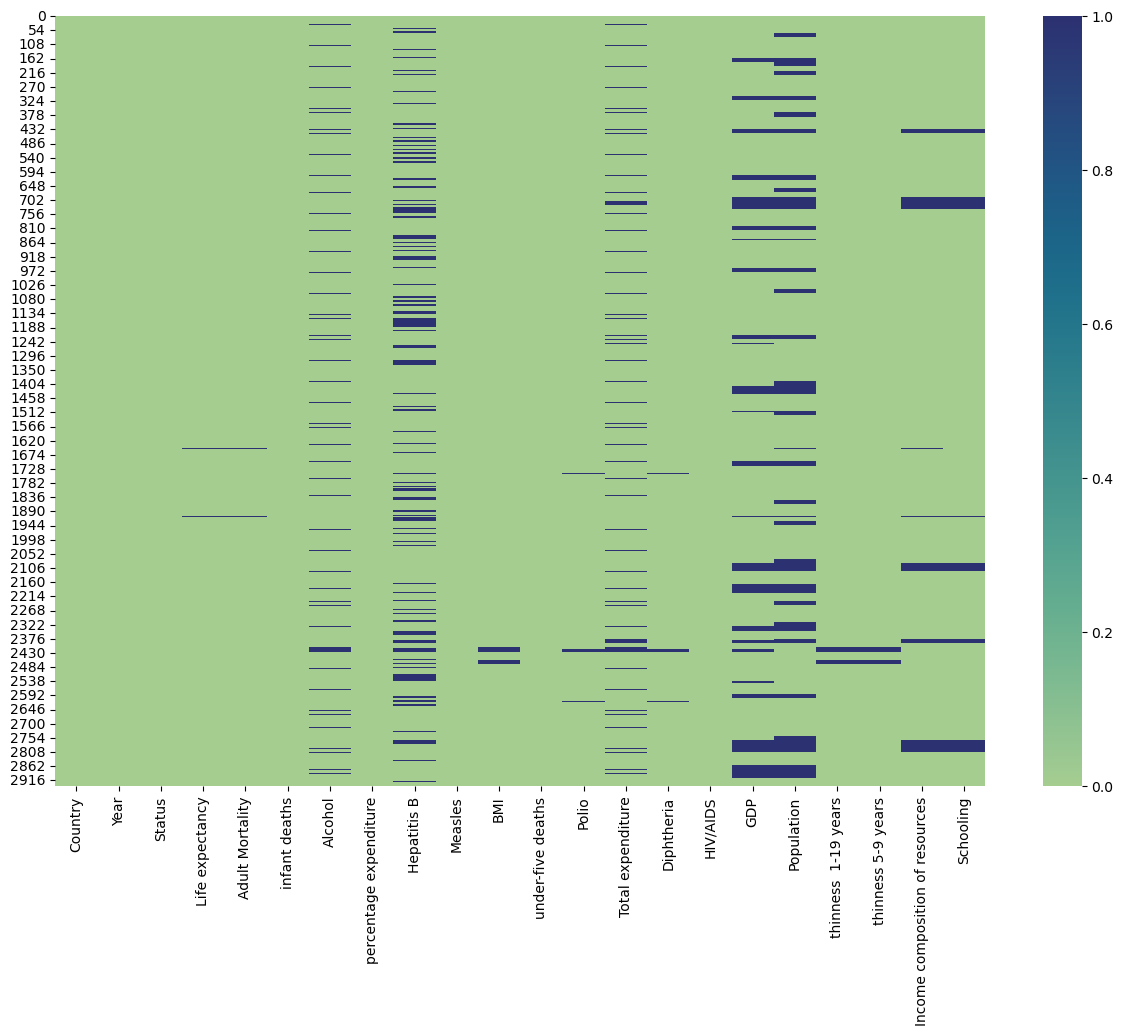

In [25]:
print(type(data.isnull))
#visual representation of missing values in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(), cmap = 'crest')
plt.show()

#### Strategy Step1:
**Drop all the rows that contain null value.**

In [27]:
# Strategy Step1: Drop all the rows that contain null value
data.dropna(
    subset=['Life expectancy', 'Adult Mortality', 'Alcohol', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
    inplace=True)
# Show the remaing columns that have null values
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        473
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                255
Population                         453
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources      0
Schooling                            0
dtype: int64

In [28]:
data['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

#### Strategy Step2. Imputate the remaining null value with mean value by `Status`

##### Hepatitis B

In [31]:
null_hep_b = data[data['Hepatitis B'].isnull()]
null_hep_b_country = null_hep_b['Country'].unique()

In [32]:
for country in null_hep_b_country:
    null_hep_b_country = null_hep_b[null_hep_b['Country'] == country]
    print(country, ":")
    print(null_hep_b_country['Year'].unique())

Algeria :
[2003 2002 2001 2000]
Angola :
[2006 2005 2004 2003 2002 2001 2000]
Antigua and Barbuda :
[2000]
Argentina :
[2001 2000]
Australia :
[2000]
Azerbaijan :
[2001 2000]
Bahamas :
[2000]
Bangladesh :
[2002 2001 2000]
Barbados :
[2000]
Benin :
[2001 2000]
Bosnia and Herzegovina :
[2003 2002 2001 2000]
Burkina Faso :
[2005 2004 2003 2002 2001 2000]
Burundi :
[2003 2002 2001 2000]
Cabo Verde :
[2001 2000]
Cambodia :
[2005 2004 2003 2002 2001 2000]
Cameroon :
[2004 2003 2002 2001 2000]
Canada :
[2002 2001 2000]
Central African Republic :
[2008 2007 2006 2005 2004 2003 2002 2001 2000]
Chad :
[2007 2006 2005 2004 2003 2002 2001 2000]
Chile :
[2005 2004 2003 2002 2001 2000]
Comoros :
[2002 2001 2000]
Congo :
[2006 2005 2004 2003 2002 2001 2000]
Croatia :
[2006 2005 2004 2003 2002 2001 2000]
Denmark :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Djibouti :
[2006 2005 2004 2003 2002 2001 2000]
Equatorial Guinea :
[2013 2012 2011 2010 2009 2008 2007 2006 200

##### GDP

In [34]:
null_gdp = data[data['GDP'].isnull()]
null_gdp_country = null_gdp['Country'].unique()

In [35]:
for country in null_gdp_country:
    null_gdp_country = null_gdp[null_gdp['Country'] == country]
    print(country, ":")
    print(null_gdp_country['Year'].unique())

Bahamas :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Bolivia (Plurinational State of) :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Congo :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Egypt :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Eritrea :
[2014 2013 2012]
Gambia :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Iran (Islamic Republic of) :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Iraq :
[2003]
Kyrgyzstan :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Lao People's Democratic Republic :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Libya :
[2014 2013 2012]
Micronesia (Federated States of) :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Saint Lucia :
[2014 2013 2012 2011 2010 2009 2008 

##### Mean value of `Hepatitis B` & `GDP` by `Status`

In [37]:
# Imputate with Developed / Developing country's median value

#Create a groupby object
data_group = data.groupby('Status')

#Select only required columns
data_columns = data_group[['Hepatitis B', 'GDP']]

#Apply aggregate function
hep_B_gdp_by_status = data_columns.mean()

hep_B_gdp_by_status

,Hepatitis B,GDP
Status,,
Developed,87.864111,22427.948354
Developing,79.801782,4288.693944


##### Fill null value (Imputate with Mean)

In [39]:
# Fill missing values for 'Hepatitis B' based on 'Status'
data.loc[data['Status'] == 'Developed', 'Hepatitis B'] = data.loc[data['Status'] == 'Developed', 'Hepatitis B'].fillna(hep_B_gdp_by_status.loc['Developed','Hepatitis B'])
data.loc[data['Status'] == 'Developing', 'Hepatitis B'] = data.loc[data['Status'] == 'Developing', 'Hepatitis B'].fillna(hep_B_gdp_by_status.loc['Developing','Hepatitis B'])

In [40]:
data['Hepatitis B'].mean()

81.17389184911195

In [41]:
# Fill missing values for 'GDP' based on 'Status'
data.loc[data['Status'] == 'Developed', 'GDP'] = data.loc[data['Status'] == 'Developed', 'GDP'].fillna(hep_B_gdp_by_status.loc['Developed','GDP'])
data.loc[data['Status'] == 'Developing', 'GDP'] = data.loc[data['Status'] == 'Developing', 'GDP'].fillna(hep_B_gdp_by_status.loc['Developing','GDP'])

#### Strategy Step3. Delete column: Population

In [43]:
null_population = data[data['Population'].isnull()]
null_population_country = null_population['Country'].unique()

In [44]:
for country in null_population_country:
    null_population_country = null_population[null_population['Country'] == country]
    print(country, ":")
    print(null_population_country['Year'].unique())

Antigua and Barbuda :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Bahamas :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Bahrain :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Barbados :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Bolivia (Plurinational State of) :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Brunei Darussalam :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Congo :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Cuba :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Egypt :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Eritrea :
[2014 2013 2012]
Gambia :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Grenada :
[2014 2013 2012 2011 2010 2009 2008 2007 20

In [45]:
len(data['Country'].unique())

171

In [46]:
# Drop Population
data.drop(columns=['Population'], inplace=True)

# Show the null value across columns
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Check and remove outliers

__[Warning from the discussion](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/discussion/161872)__
- The maximum infant death number (per 1000 population) is 1800
    - replace those > 1000 with null
- The maximum number of reported Measles cases per 1000 population is 212183
    - replace those > 1000 with null
- The maximum number of under-five deaths per 1000 population is 2500
    - replace those > 1000 with null

In [49]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.00000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,2007.028951,69.323905,162.341549,29.721049,4.554276,846.825339,81.173892,2253.750000,38.228091,41.168623,82.86385,5.867973,82.762520,1.838146,7375.773626,4.906651,4.945305,0.628416,12.060603
std,4.319521,9.397971,124.228069,123.168632,4.011385,2109.803754,22.610377,10778.382964,19.755899,167.717366,22.92121,2.374123,23.171621,5.374554,13851.851296,4.508649,4.600552,0.208776,3.211195
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.00000,0.370000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.675000,73.000000,0.000000,0.860000,19.152439,79.801782,0.000000,19.100000,0.000000,78.00000,4.260000,79.000000,0.100000,519.334821,1.600000,1.600000,0.494000,10.200000
50%,2007.000000,72.200000,142.500000,3.000000,3.775000,103.447422,87.864111,15.000000,43.800000,3.000000,93.00000,5.705000,93.000000,0.100000,2528.787928,3.350000,3.350000,0.677000,12.300000
75%,2011.000000,75.400000,224.000000,19.000000,7.530000,547.081536,96.000000,339.250000,55.800000,24.000000,97.00000,7.440000,97.000000,0.700000,5422.063855,7.300000,7.300000,0.779000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.100000,2500.000000,99.00000,14.390000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.945000,20.700000


#### per 1000 population: Replace > 1000 with Null

In [51]:
# value of infant deaths, Measles, and under-five deaths should be <= 1000
cols = ["infant deaths", "Measles", "under-five deaths"]

import numpy as np
# Single label for row and column: df.loc['row', 'column']
for col in cols:
    data.loc[data[col]>1000, col] = np.nan # Selects the rows in column col where the condition data[col] > 1000 is True, then replace it with Null

In [52]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2556.000000,2556.000000,2556.000000,2543.000000,2556.000000,2556.000000,2556.000000,2116.000000,2556.000000,2541.000000,2556.00000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,2007.028951,69.323905,162.341549,22.401494,4.554276,846.825339,81.173892,89.054348,38.228091,30.431720,82.86385,5.867973,82.762520,1.838146,7375.773626,4.906651,4.945305,0.628416,12.060603
std,4.319521,9.397971,124.228069,66.443693,4.011385,2109.803754,22.610377,189.429364,19.755899,87.975358,22.92121,2.374123,23.171621,5.374554,13851.851296,4.508649,4.600552,0.208776,3.211195
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.00000,0.370000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.675000,73.000000,0.000000,0.860000,19.152439,79.801782,0.000000,19.100000,0.000000,78.00000,4.260000,79.000000,0.100000,519.334821,1.600000,1.600000,0.494000,10.200000
50%,2007.000000,72.200000,142.500000,3.000000,3.775000,103.447422,87.864111,3.000000,43.800000,3.000000,93.00000,5.705000,93.000000,0.100000,2528.787928,3.350000,3.350000,0.677000,12.300000
75%,2011.000000,75.400000,224.000000,18.000000,7.530000,547.081536,96.000000,64.000000,55.800000,23.000000,97.00000,7.440000,97.000000,0.700000,5422.063855,7.300000,7.300000,0.779000,14.200000
max,2015.000000,89.000000,723.000000,1000.000000,17.870000,19479.911610,99.000000,999.000000,77.100000,943.000000,99.00000,14.390000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.945000,20.700000


## Exploratory Data Analysis (EDA)

**Highlights:**
- `Life expectancy`: 70~80 years old
- `infant deaths`, `Measles`, and `under-five deaths` are all under 1000 after replacing with null
- **Right skew ( > 1)**: `Population`, `infant deaths`, `under-five deaths `, `HIV/AIDS`, `percentage expenditure`, `GDP`, `Measles`, `thinness 5-9 years`, `thinness  1-19 years`, `Adult Mortality`
- **Left skew ( < -1)**: `Income composition of resources`, `Hepatitis B`, `Diphtheria`, `Polio`

<br>

**Methods:**
- `pandas.DataFrame.hist` : Only **numerical columns** will be plotted. __[Here for more info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)__
- `subplot(nrows, ncols, index)` __[Here for more info](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)__
- `kdeplot` : Only **numerical columns** will be plotted. __[Here for more info](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)__

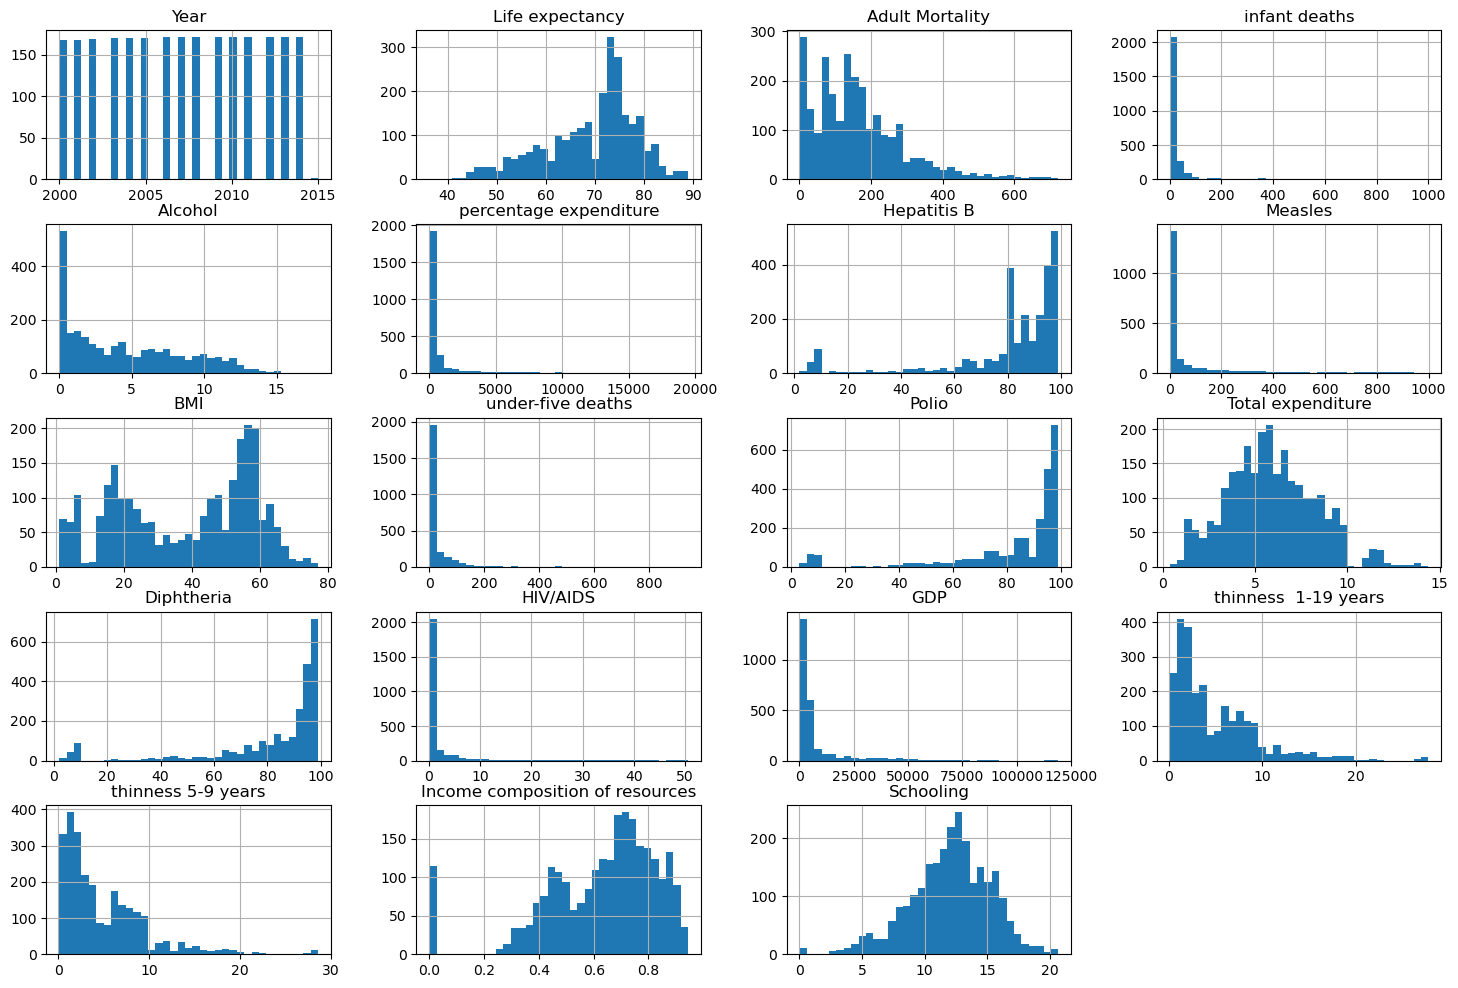

In [55]:
# Check the histograms
data.hist(bins=35, figsize=(18, 12))
plt.show()

In [56]:
num_cols = data.select_dtypes("number").columns # select all numeric types
print(f"There are {len(cols)} numeric columns: \n {cols}")

non_num_cols = data.select_dtypes(exclude=['int64', 'float64']).columns # select all numeric types
print(f"There are {len(non_num_cols)} non numeric columns: \n {non_num_cols}")

There are 3 numeric columns: 
 ['infant deaths', 'Measles', 'under-five deaths']
There are 2 non numeric columns: 
 Index(['Country', 'Status'], dtype='object')


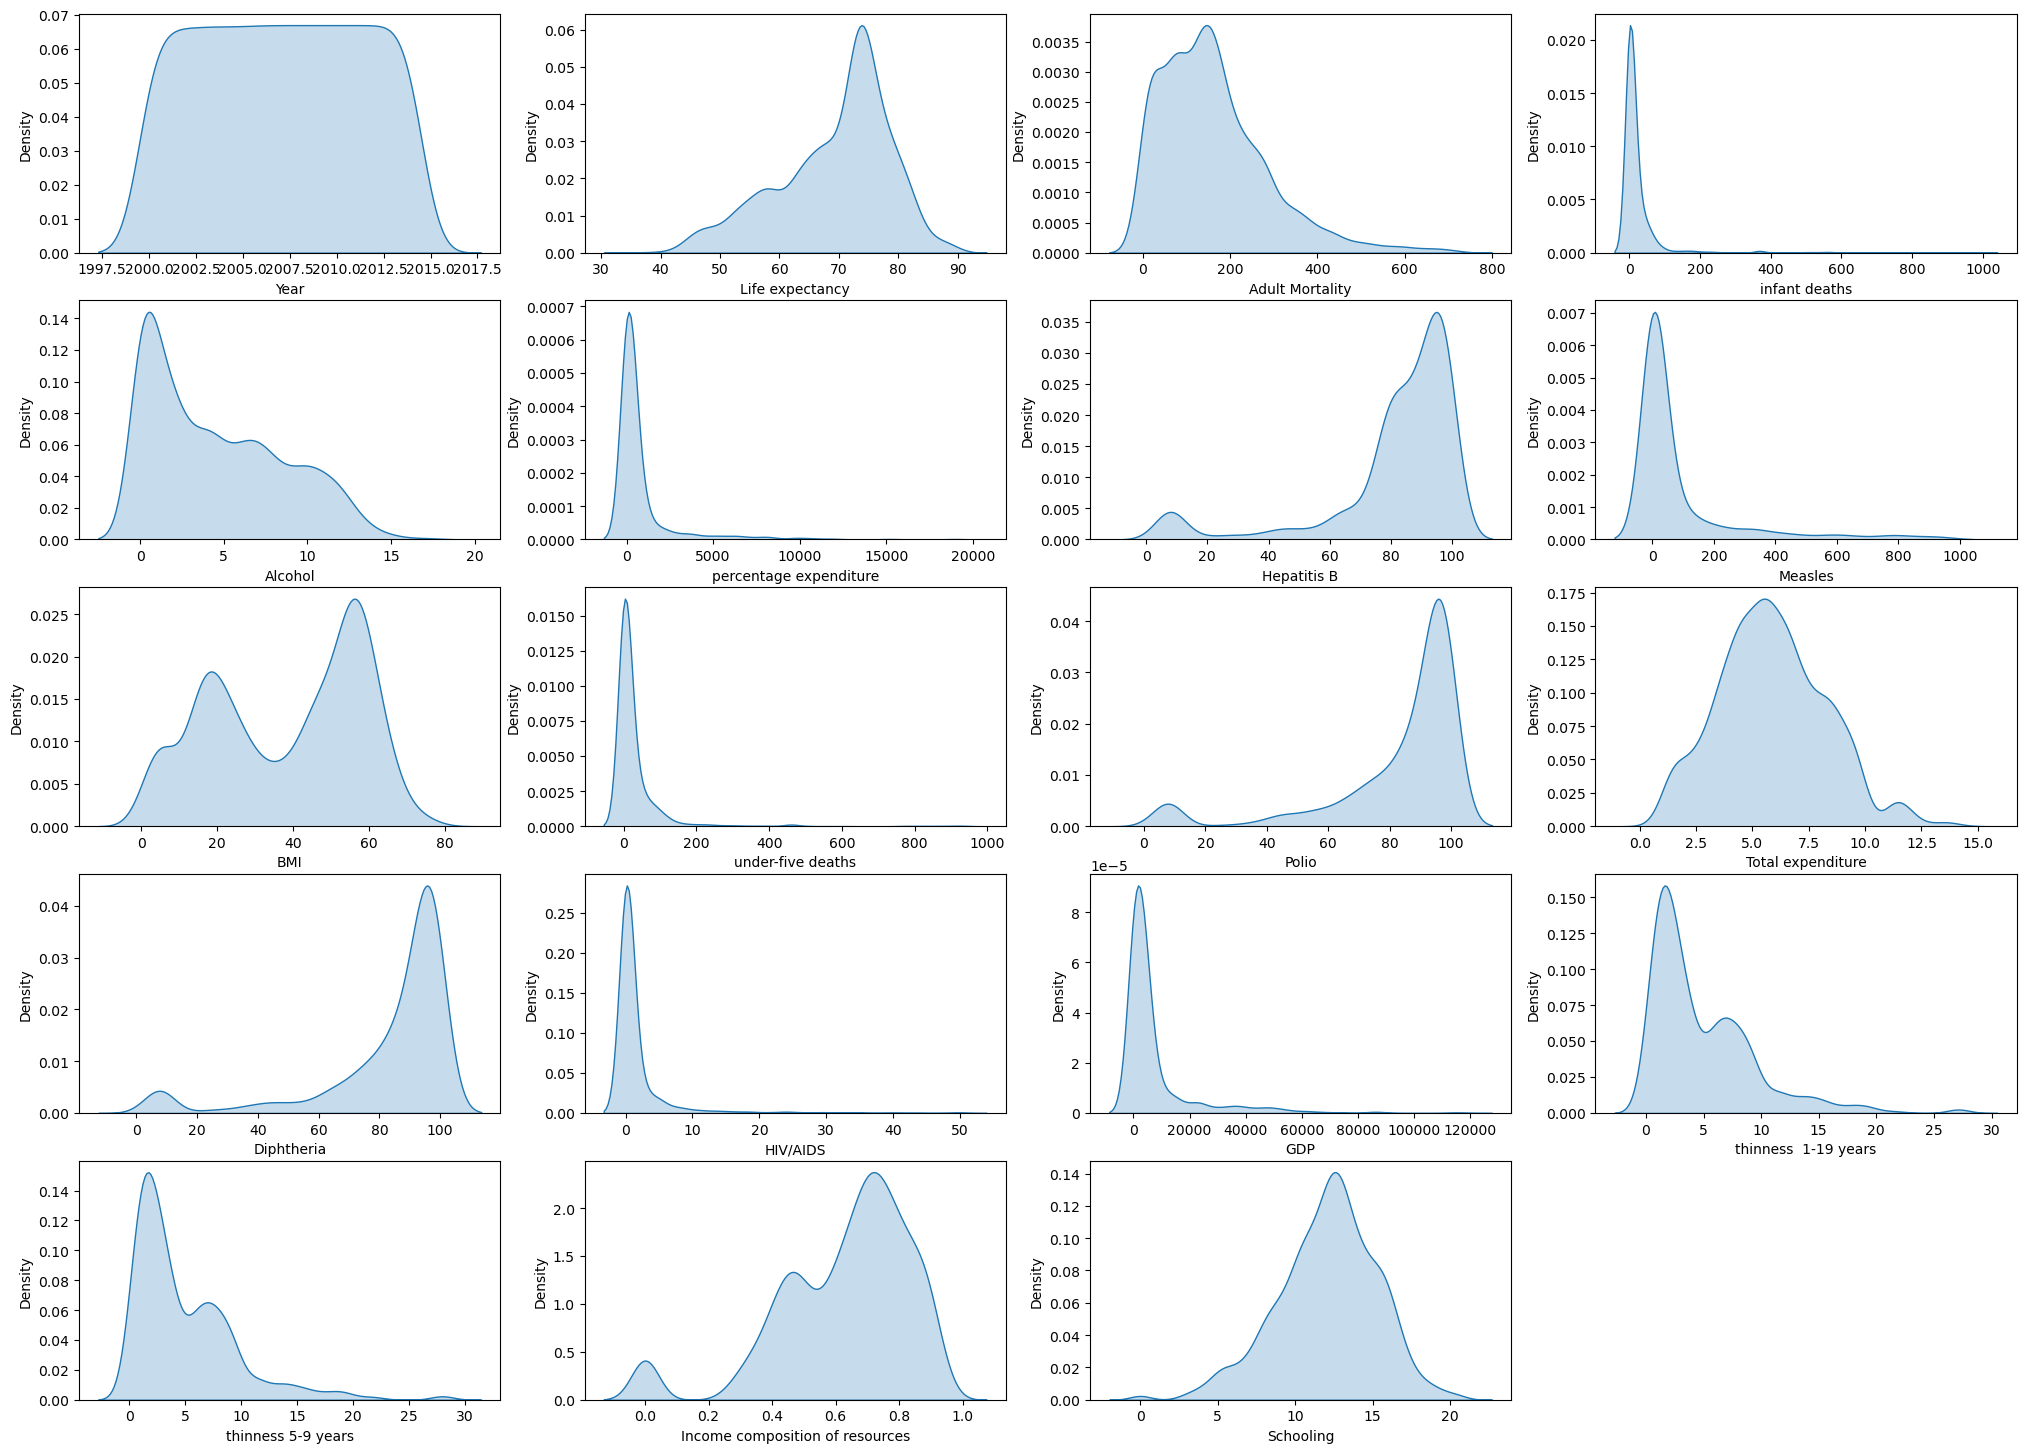

In [57]:
fig = plt.figure(figsize=(25,18))

graph_index = 1 # Set the position of the subplot to 1
for col in num_cols:
    plt.subplot(5, 4, graph_index) # subplot(nrows, ncols, index)
    graph = sns.kdeplot(data = data, x = col, fill = True)
    graph_index += 1 # Set the position to the next one

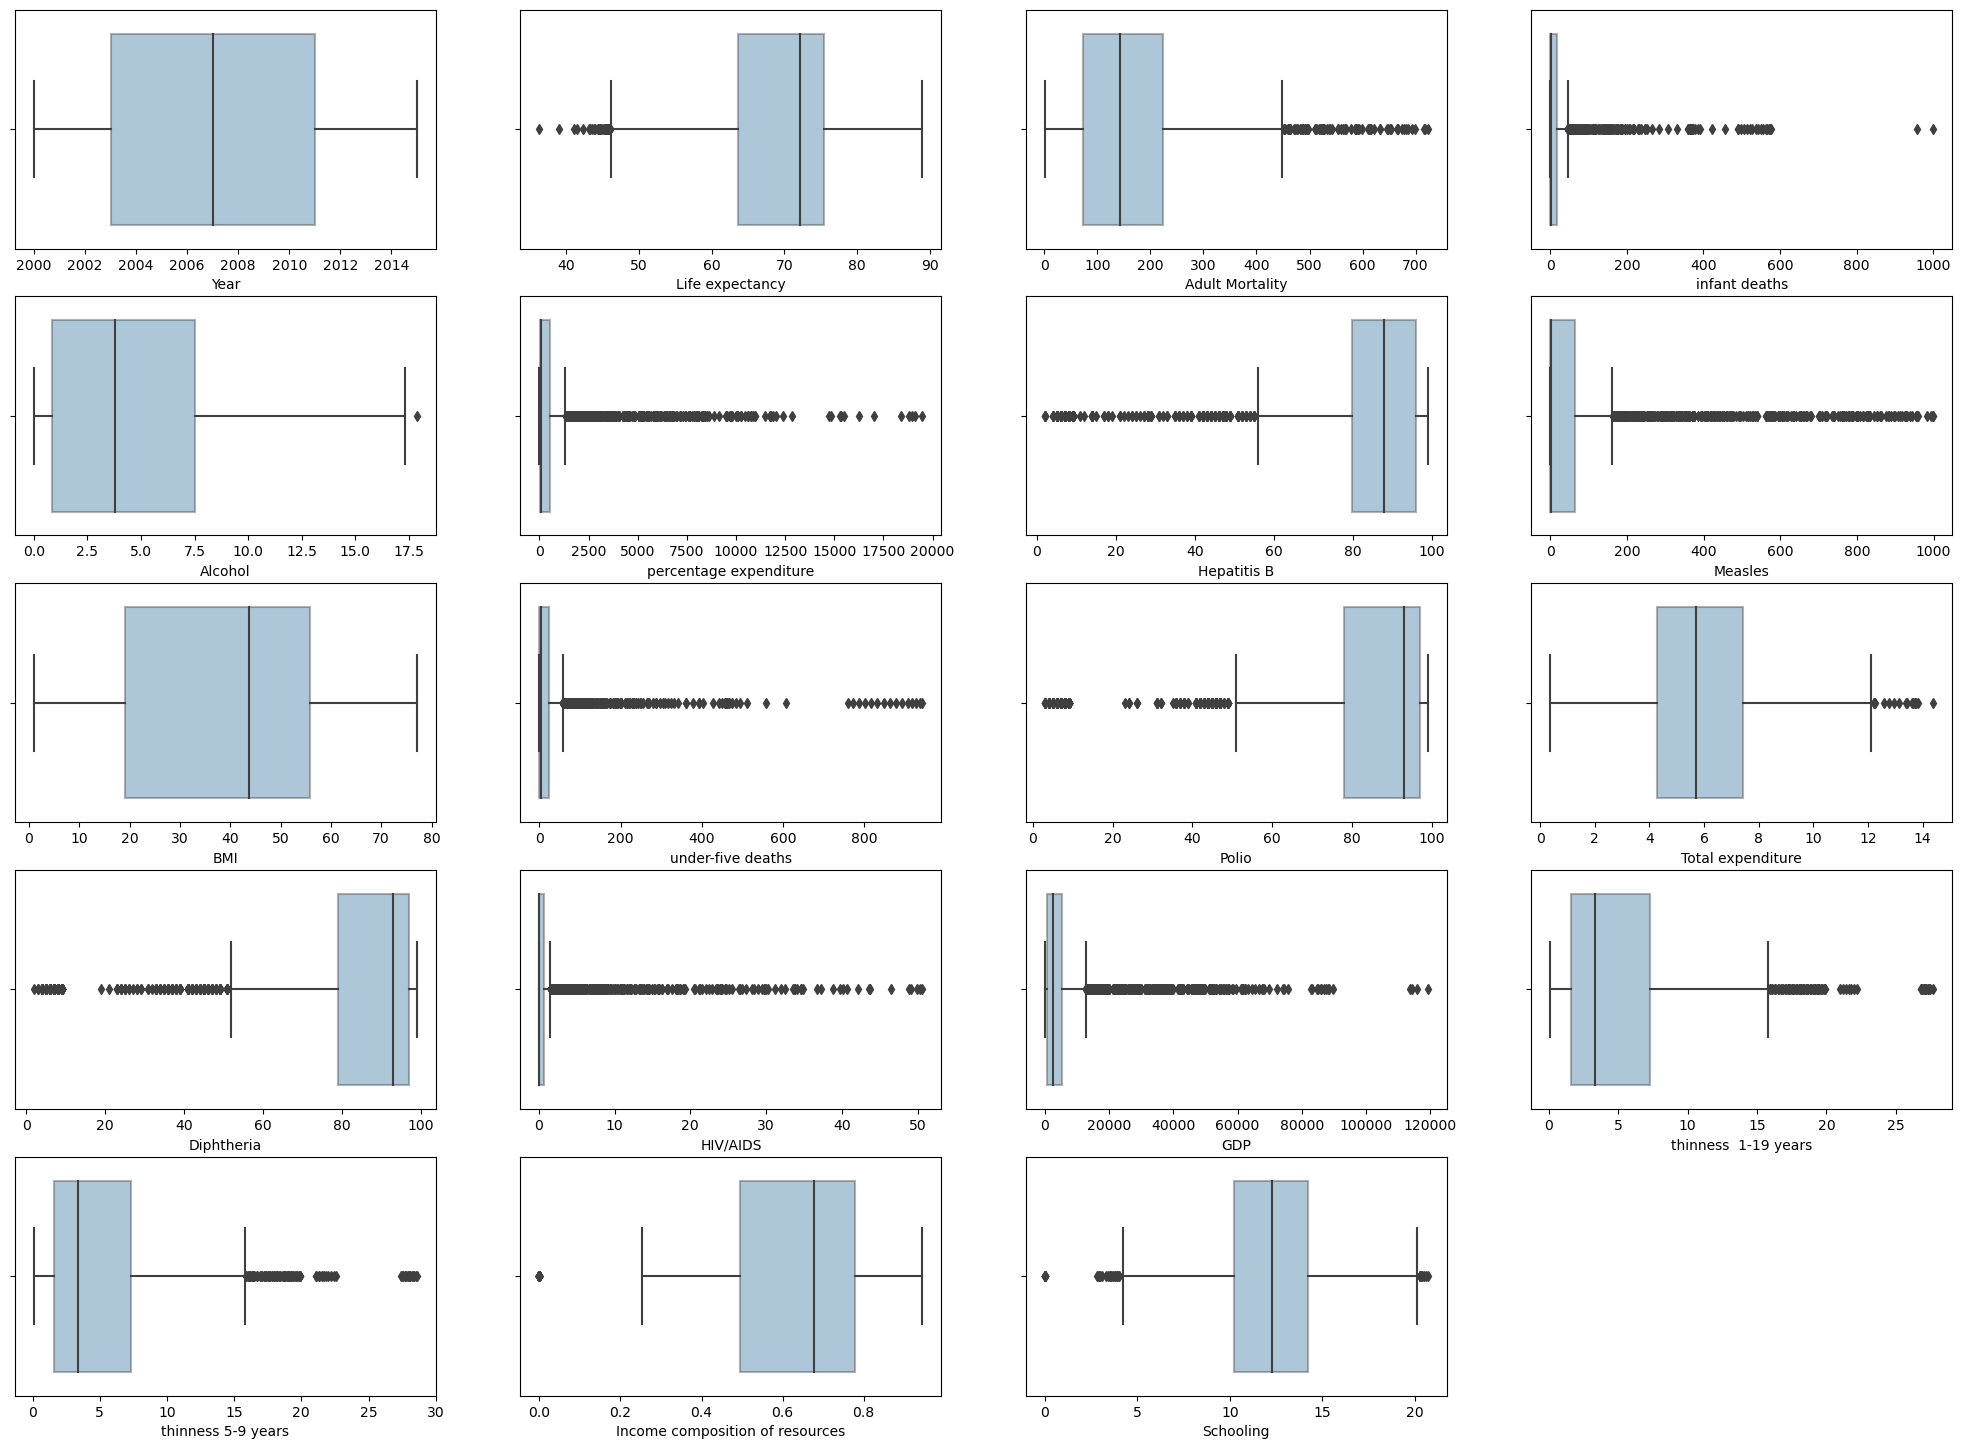

In [58]:
fig = plt.figure(figsize=(25,18))

boxplot_index = 1 # Set the position of the subplot to 1
for col in num_cols:
    plt.subplot(5, 4, boxplot_index) # subplot(nrows, ncols, index)
    boxplot = sns.boxplot(data=data, x=col, boxprops=dict(alpha=0.4))  # Set alpha for transparency
    boxplot_index += 1 # Set the position to the next one

In [59]:
data.skew(axis = 0, skipna=True, numeric_only=True).sort_values(ascending=False) # Skewness in each numeric column with ascending order

infant deaths                      6.849506
under-five deaths                  6.504366
HIV/AIDS                           5.158575
percentage expenditure             4.325302
GDP                                3.346914
Measles                            2.751477
thinness 5-9 years                 1.770686
thinness  1-19 years               1.703232
Adult Mortality                    1.265098
Alcohol                            0.604882
Total expenditure                  0.310864
Year                              -0.005300
BMI                               -0.263822
Schooling                         -0.432252
Life expectancy                   -0.688201
Income composition of resources   -1.141179
Diphtheria                        -2.132434
Polio                             -2.136964
Hepatitis B                       -2.149792
dtype: float64

- **Positive** value: The distribution is skewed to the **right**.
- **Negative** value: The distribution is skewed to the **left**.
- **0**: **Perfect normal distribution**.

### Correlation

## Data Visualization

## Predictive Model

## Additional Topic: Scikit-learn Pipeline (ToDo: Check it out)
__[Pipeline Intro](https://www.freecodecamp.org/news/machine-learning-pipeline/)__
- https://medium.com/@sahin.samia/scikit-learn-pipelines-explained-streamline-and-optimize-your-machine-learning-processes-f17b1beb86a4

**Notebook Referencing:**
- https://www.kaggle.com/code/mo7amedali/life-expectancy-modeling